## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


### Find no.of samples are there in training and test datasets

In [2]:
print("Number of samples in training set",x_train.shape[0])

Number of samples in training set 60000


In [3]:
print("Number of samples in test set",x_test.shape[0])

Number of samples in test set 10000


### Find dimensions of an image in the dataset

In [4]:
x_train.shape

(60000, 28, 28)

####Image shape is 28*28

In [5]:
import numpy as np
np.unique( y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
#there are 10 classes

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
numClasses=np.unique( y_train).shape[0]

In [8]:
#Encoding the output class label (One-Hot Encoding)
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train,numClasses)
y_test=np_utils.to_categorical(y_test,numClasses)
y_train[2]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
#Represent Training & Testing samples suitable for tensorflow backend
x_train=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')    # The digit 1 signifies the images are in grayscale
x_test=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

### Normalize both the train and test image data from 0-255 to 0-1

In [10]:
np.max(x_train),np.min(x_train)

(255.0, 0.0)

In [0]:
#has minimum and maximum values as 0 and 255. so dividing by 255 makes all the values to be between 0 and 1

In [0]:
x_train/=255  # standardize the data for train and test to be between 0 -1

In [0]:
x_test/=255   # standardize the data for train and test to be between 0 -1

### Import the necessary layers from keras to build the model

In [0]:
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [15]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping
input_shape = (28,28,1)
num_classes = 10

model = Sequential() 
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape))
model.add(Conv2D(33, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dense(10, activation='softmax')) 
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
batch_size=100 #setting batch size as 100
epochs = 10
early_stopping = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=callback_list)




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 33)        26433     
_________________________________________________________________
flatten_1 (Flatten)          (None, 13200)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1689728   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,718,283
Trainable params: 1,718,283
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3815602901697159
Test accuracy: 0.9085


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [17]:
input_shape = (28,28,1)
num_classes = 10

model = Sequential() 
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape))
model.add(Conv2D(33, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(p=0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dense(10, activation='softmax')) 
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
batch_size=100 #setting batch size as 100
epochs = 10
early_stopping = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=callback_list)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 33)        26433     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 33)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 33)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3300)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               422528    
___

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.25)`
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.4732 - acc: 0.8283 - val_loss: 0.3760 - val_acc: 0.8689
Epoch 2/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.3126 - acc: 0.8867 - val_loss: 0.2937 - val_acc: 0.8956
Epoch 3/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.2659 - acc: 0.9021 - val_loss: 0.2717 - val_acc: 0.9028
Epoch 4/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.2333 - acc: 0.9137 - val_loss: 0.2581 - val_acc: 0.9065
Epoch 5/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.2122 - acc: 0.9205 - val_loss: 0.2532 - val_acc: 0.9120
Epoch 6/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.1882 - acc: 0.9301 - val_loss: 0.2419 - val_acc: 0.9150
Epoch 7/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1723 - acc: 0.9351 - val_loss: 0.2534 - val_acc

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2362638767182827
Test accuracy: 0.9221


In [0]:
#after adding additional layers, test accuracy has increased

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator
# Create object to transform data
data_generator = ImageDataGenerator(rotation_range=15,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [0]:

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
data_generator.fit(x_train)


#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

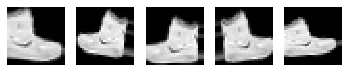

In [21]:
from matplotlib import pyplot as plt
gen = data_generator.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [22]:
# fits the model on batches with real-time data augmentation:
model.fit_generator(data_generator.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5807 - acc: 0.7838
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4708 - acc: 0.8243
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4344 - acc: 0.8367
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4163 - acc: 0.8438
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4023 - acc: 0.8500
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3926 - acc: 0.8536
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3845 - acc: 0.8561
Epoch 8/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3752 - acc: 0.8591
Epoch 9/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3712 - acc: 0.8620
Epoch 10/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3655 - acc: 0.8643


###  Report the final train and validation accuracy

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Test loss: 0.2740961897909641
Test accuracy: 0.8994
Train loss: 0.23842241941392422
Train accuracy: 0.9115333333333333


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
from keras.preprocessing.image import ImageDataGenerator
# Create object to transform data
def data_gen():
  datagen = ImageDataGenerator(
             # rotation_range=3,
              rotation_range=15,
              fill_mode='nearest',
              width_shift_range=0.1,
              height_shift_range=0.1,
              horizontal_flip=True,
              vertical_flip=True,
              shear_range=0.2,
              zoom_range=0.2,
              )
  return datagen

### **Prepare/fit the generator.**

In [0]:
datagen=data_gen()
datagen.fit(X_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

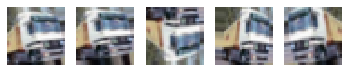

In [29]:
from matplotlib import pyplot as plt
gen = datagen.flow(X_train[1:2])
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()